In [1]:
import pandas as pd
import math
import numpy as np
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
# def Kd_to_deltaG(Kd):
#     if Kd > 0:
#         deltaG = (math.log10(Kd)*(1.98*298.15))/1000
#         return deltaG
#     else:
#         deltaG = 0
#         return deltaG
    


In [3]:
def Kd_2_dG(Kd):
    deltaG = np.log(Kd)*(8.314/4184)*(298.15)
    
    return deltaG

In [29]:
df = pd.read_csv("../data/skempi_v2.csv",sep=";",engine='python')

In [30]:
df['Affinity_mut (M)'] = df['Affinity_mut (M)'].str.replace(',','.')
df['Affinity_wt (M)'] = df['Affinity_wt (M)'].str.replace(',','.')

df['Affinity_mut (M)'] = df['Affinity_mut (M)'].str.replace('>','')
df['Affinity_wt (M)']= df['Affinity_wt (M)'].str.replace('>','')


#df['Affinity_mut (M)'] = df['Affinity_mut (M)'].str.replace('n.b','0')
df['Affinity_mut (M)'] = df['Affinity_mut (M)'].str.replace('<','')
df['Affinity_wt (M)']= df['Affinity_wt (M)'].str.replace('<','')

df['Affinity_mut (M)'] = df['Affinity_mut (M)'].str.replace('~','')
df['Affinity_wt (M)']= df['Affinity_wt (M)'].str.replace('~','')

df = df.loc[-(df['Affinity_mut (M)'] == 'unf')]
df = df.loc[-(df['Affinity_wt (M)'] == 'unf')]

df = df.loc[-(df['Affinity_mut (M)'].str.startswith('n.b'))]
df = df.loc[-(df['Affinity_wt (M)'].str.startswith('n.b'))]

df['Affinity_mut (M)'] = df['Affinity_mut (M)'].astype(float)
df['Affinity_wt (M)'] = df['Affinity_wt (M)'].astype(float)

In [31]:
#df2 = df.loc[-(df["Affinity_mut (M)"] == 0.0)]

In [32]:
#df2.loc[df2['Mutation(s)_PDB'].str.split(',').str.len()==1]

In [33]:
#df2.loc[(df2.ddG.abs() > 6)]

In [34]:
df['Hold_out_type'].unique()

array(['Pr/PI', nan, 'AB/AG', 'AB/AG,Pr/PI', 'TCR/pMHC'], dtype=object)

In [35]:
ab_data = df.loc[(df['Hold_out_type'] == 'AB/AG,Pr/PI') | (df['Hold_out_type'] == 'AB/AG')]
ab_data_singleMut = ab_data.loc[ab_data['Mutation(s)_PDB'].str.split(',').str.len()==1].copy()
ab_data_singleMut.shape

(797, 29)

In [36]:
ab_data_singleMut['ddG'] = ab_data_singleMut['Affinity_mut (M)'].apply(Kd_2_dG) - ab_data_singleMut['Affinity_wt (M)'].apply(Kd_2_dG)
ab_data_singleMut.shape

(797, 30)

In [37]:
ab_data_singleMut

,#Pdb,Mutation(s)_PDB,Mutation(s)_cleaned,iMutation_Location(s),Hold_out_type,Hold_out_proteins,Affinity_mut (M),Affinity_mut_parsed,Affinity_wt (M),Affinity_wt_parsed,...,koff_wt (s^(-1)),koff_wt_parsed,dH_mut (kcal mol^(-1)),dH_wt (kcal mol^(-1)),dS_mut (cal mol^(-1) K^(-1)),dS_wt (cal mol^(-1) K^(-1)),Notes,Method,SKEMPI version,ddG
282,1AHW_AB_C,YC156A,YC145A,COR,AB/AG,AB/AG,2.100000e-06,2.1E-06,3.400000e-09,3.4E-09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IASP,2,3.807047
283,1AHW_AB_C,YC157A,YC146A,SUP,AB/AG,AB/AG,1.400000e-10,1.4E-10,3.400000e-09,3.4E-09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IASP,1,-1.889856
285,1AHW_AB_C,TC167A,TC156A,COR,AB/AG,AB/AG,3.000000e-09,"3,00E-09",3.400000e-09,3.4E-09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IASP,1,-0.074153
287,1AHW_AB_C,TC170A,TC159A,SUP,AB/AG,AB/AG,2.200000e-08,2.2E-08,3.400000e-09,3.4E-09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IASP,1,1.106266
288,1AHW_AB_C,LC176A,LC165A,RIM,AB/AG,AB/AG,1.800000e-08,1.8E-08,3.400000e-09,3.4E-09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IASP,1,0.987378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6773,3SE9_HL_G,EL96A,EL90A,COR,AB/AG,AB/AG,5.000000e-08,"5,00E-08",2.500000e-08,2.5E-08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SPR,2,0.410656
6774,3SE9_HL_G,FL97A,FL91A,RIM,AB/AG,AB/AG,2.600000e-08,2.6E-08,2.500000e-08,2.5E-08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SPR,2,0.023236
7043,1YQV_HL_Y,RY45K,RY45K,COR,AB/AG,"AB/AG,1UUZ_A_D",1.090000e-10,1.09E-10,3.720000e-12,3.72E-12,...,NaN,NaN,-14.0,-18.7,-38.869.257.951,-137.809.187.279,NaN,ITC,2,2.001080
7044,1YQV_HL_Y,RY45K,RY45K,COR,AB/AG,"AB/AG,1UUZ_A_D",6.810000e-10,6.81E-10,2.320000e-11,2.32E-11,...,NaN,NaN,-19.3,-22.6,-228.187.919.463,-271.812.080.537,NaN,ITC,2,2.002138


In [38]:
ab_data_singleMut['chain'] = ab_data_singleMut["Mutation(s)_cleaned"].str[1]
ab_data_singleMut['partners'] = ab_data_singleMut["#Pdb"].str.split('_',1,expand=True)[1]
ab_data_singleMut['#Pdb'] = ab_data_singleMut["#Pdb"].str.split('_',1,expand=True)[0]

In [39]:
ab_data_singleMut['mutant'] = ab_data_singleMut["Mutation(s)_PDB"].str[0]+\
                                ab_data_singleMut["Mutation(s)_PDB"].str[2:]

In [40]:
ab_data_singleMut.rename(columns={'#Pdb':'#PDB'},inplace=True)

In [41]:
# ab_data_singleMut["pdb_mutation_cleaned"] = ab_data_singleMut["#Pdb"].str.split('_',1,expand=True)[0]+'.'+\
#                                     ab_data_singleMut["#Pdb"].str.split('_',1,expand=True)[1]+"."+\
#                                     ab_data_singleMut["Mutation(s)_cleaned"].str[1]+\
#                                     ab_data_singleMut["Mutation(s)_cleaned"].str[0]+\
#                                     ab_data_singleMut["Mutation(s)_cleaned"].str[2:]
                
# ab_data_singleMut["pdb_mutation_ori"] = ab_data_singleMut["#Pdb"].str.split('_',1,expand=True)[0]+'.'+\
#                                     ab_data_singleMut["#Pdb"].str.split('_',1,expand=True)[1]+"."+\
#                                     ab_data_singleMut["Mutation(s)_PDB"].str[1]+\
#                                     ab_data_singleMut["Mutation(s)_PDB"].str[0]+\
#                                     ab_data_singleMut["Mutation(s)_PDB"].str[2:]
ab_data_singleMut['pdb_mutation'] = ab_data_singleMut['#PDB']+'.'+ab_data_singleMut['mutant']


In [42]:
ab_data_singleMut.head()

,#PDB,Mutation(s)_PDB,Mutation(s)_cleaned,iMutation_Location(s),Hold_out_type,Hold_out_proteins,Affinity_mut (M),Affinity_mut_parsed,Affinity_wt (M),Affinity_wt_parsed,...,dS_mut (cal mol^(-1) K^(-1)),dS_wt (cal mol^(-1) K^(-1)),Notes,Method,SKEMPI version,ddG,chain,partners,mutant,pdb_mutation
282,1AHW,YC156A,YC145A,COR,AB/AG,AB/AG,2.100000e-06,2.1E-06,3.400000e-09,3.4E-09,...,NaN,NaN,NaN,IASP,2,3.807047,C,AB_C,Y156A,1AHW.Y156A
283,1AHW,YC157A,YC146A,SUP,AB/AG,AB/AG,1.400000e-10,1.4E-10,3.400000e-09,3.4E-09,...,NaN,NaN,NaN,IASP,1,-1.889856,C,AB_C,Y157A,1AHW.Y157A
285,1AHW,TC167A,TC156A,COR,AB/AG,AB/AG,3.000000e-09,"3,00E-09",3.400000e-09,3.4E-09,...,NaN,NaN,NaN,IASP,1,-0.074153,C,AB_C,T167A,1AHW.T167A
287,1AHW,TC170A,TC159A,SUP,AB/AG,AB/AG,2.200000e-08,2.2E-08,3.400000e-09,3.4E-09,...,NaN,NaN,NaN,IASP,1,1.106266,C,AB_C,T170A,1AHW.T170A
288,1AHW,LC176A,LC165A,RIM,AB/AG,AB/AG,1.800000e-08,1.8E-08,3.400000e-09,3.4E-09,...,NaN,NaN,NaN,IASP,1,0.987378,C,AB_C,L176A,1AHW.L176A


In [43]:
ab_data_singleMut_duplicated =  ab_data_singleMut.loc[ab_data_singleMut.duplicated(subset=['chain','pdb_mutation'],keep=False)]
ab_data_singleMut_notduplicated = ab_data_singleMut.loc[-ab_data_singleMut.duplicated(subset=['chain','pdb_mutation'],keep=False)]
ab_data_singleMut_notduplicated.shape,ab_data_singleMut_duplicated.shape

((601, 34), (196, 34))

In [44]:
def filter_duplicated_bymethod(data):
    if data.Method.unique().shape[0]>1:
        data = data.loc[data['Method'].isin(['SPR','KinExA','IASP'])].iloc[[0]]
    else:
        data = data.loc[[data['ddG'].idxmin()]]
    return data

In [45]:
ab_data_singleMut_duplicated_filtered = ab_data_singleMut_duplicated.groupby(by=['chain','pdb_mutation'],group_keys=False).apply(filter_duplicated_bymethod)
ab_data_singleMut_duplicated_filtered.shape

(95, 34)

In [46]:
final_skempi_ab = pd.concat([ab_data_singleMut_notduplicated,ab_data_singleMut_duplicated_filtered])
final_skempi_ab.shape

(696, 34)

In [47]:
final_skempi_ab.to_csv('../data/skempi_ABlike_singleMut.Final.csv')

In [23]:
#ab_data_singleMut_filtered = ab_data_singleMut.loc[-(ab_data_singleMut["Affinity_mut (M)"] == 0.0)]

In [21]:
#ab_data_singleMut_filtered.loc[(ab_data_singleMut_filtered.ddG.abs() > 6)]

# check distributions

/home/vilion/miniconda3/envs/bio/lib/python3.6/site-packages/numpy/core/_methods.py:75: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


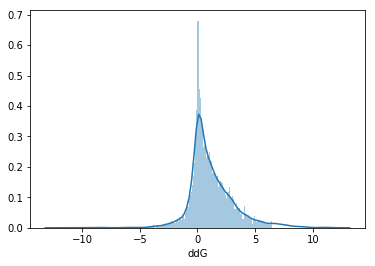

In [25]:
g = sns.distplot(df['ddG'],bins=np.arange(-5,6.6,0.1))
#g.set_xlim(0)

In [42]:
stats.kstest(df['ddG'], "f", stats.f.fit(df['ddG']))

KstestResult(statistic=0.6015200903274733, pvalue=0.0)

In [35]:
import pandas as pd
import numpy as np
import scipy
from sklearn.preprocessing import StandardScaler
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline
# Load data and select first column

In [36]:
df_final = pd.read_csv("../data/DF_train15_skempiAB_modeller_final.csv",index_col=0)


In [37]:
y = df_final.ddG_exp.values
size = len(y) 

In [38]:
sc=StandardScaler() 
yy = y.reshape (-1,1)
sc.fit(yy)
y_std =sc.transform(yy)
y_std = y_std.flatten()
y_std
del yy

In [39]:
# Set up list of candidate distributions to use
# See https://docs.scipy.org/doc/scipy/reference/stats.html for more

dist_names = ['beta',
              'johnsonsu',
              'gamma',
              'lognorm',
              'genlogistic',
              'pearson3',
              'triang',
              'uniform',
              'genextreme', 
              'weibull_max',
                'f',
              'gilbrat',
             't',
            'nct',
             'logistic',
             'gumbel_r',
             'dgamma']

# Set up empty lists to stroe results
chi_square = []
p_values = []

# Set up 50 bins for chi-square test
# Observed data will be approximately evenly distrubuted aross all bins
percentile_bins = np.linspace(0,100,51)
percentile_cutoffs = np.percentile(y_std, percentile_bins)
observed_frequency, bins = (np.histogram(y_std, bins=percentile_cutoffs))
cum_observed_frequency = np.cumsum(observed_frequency)

# Loop through candidate distributions

for distribution in dist_names:
    # Set up distribution and get fitted distribution parameters
    dist = getattr(scipy.stats, distribution)
    param = dist.fit(y_std)
    
    # Obtain the KS test P statistic, round it to 5 decimal places
    p = scipy.stats.kstest(y_std, distribution, args=param)[1]
    p = np.around(p, 5)
    p_values.append(p)    
    
    # Get expected counts in percentile bins
    # This is based on a 'cumulative distrubution function' (cdf)
    cdf_fitted = dist.cdf(percentile_cutoffs, *param[:-2], loc=param[-2], 
                          scale=param[-1])
    expected_frequency = []
    for bin in range(len(percentile_bins)-1):
        expected_cdf_area = cdf_fitted[bin+1] - cdf_fitted[bin]
        expected_frequency.append(expected_cdf_area)
    
    # calculate chi-squared
    expected_frequency = np.array(expected_frequency) * size
    cum_expected_frequency = np.cumsum(expected_frequency)
    ss = sum (((cum_expected_frequency - cum_observed_frequency) ** 2) / cum_observed_frequency)
    chi_square.append(ss)
        
# Collate results and sort by goodness of fit (best at top)

results = pd.DataFrame()
results['Distribution'] = dist_names
results['chi_square'] = chi_square
results['p_value'] = p_values
results.sort_values(['chi_square'], inplace=True)
    
# Report results

print ('\nDistributions sorted by goodness of fit:')
print ('----------------------------------------')
print (results)

/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2316: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Users/vfica/miniconda3/envs/bio/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:1680: RuntimeWarning: divide by zero encountered in log
  lPx = m/2 * np.log(m) + n/2 * np.log(n) + (n/2 - 1) * np.log(x)



Distributions sorted by goodness of fit:
----------------------------------------
   Distribution     chi_square  p_value
1     johnsonsu     104.207123  0.00763
13          nct     126.849814  0.00301
12            t     126.852156  0.00301
16       dgamma     156.908588  0.02284
4   genlogistic     355.410753  0.00000
14     logistic     362.930934  0.00000
2         gamma     889.291003  0.00000
0          beta     889.749458  0.00000
3       lognorm     892.296653  0.00000
9   weibull_max    1290.208058  0.00000
8    genextreme    1290.239138  0.00000
15     gumbel_r    2484.110600  0.00000
6        triang    4662.818844  0.00000
7       uniform   12838.922560  0.00000
11      gilbrat   15058.222574  0.00000
10            f   65303.714152  0.00000
5      pearson3  142631.728223  0.00000
